## NJSLA Spring 25 ELA Testing Time Linear Regression

Analysis of the ELA results of the Spring 25 NJSLA

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt

In [2]:
# importing dataset
df_ela = pd.read_excel(r"S:\ASSESSMENTS\NJSLA 2025\NJSLA 2025 ELA Math Summative Record File.xlsx", parse_dates = ['Unit1OnlineTestEndDateTime','Unit1OnlineTestStartDateTime',
                                                                                                                   'Unit2OnlineTestStartDateTime','Unit2OnlineTestEndDateTime',
                                                                                                                  'Unit3OnlineTestStartDateTime','Unit3OnlineTestEndDateTime'])
df_ela = df_ela[df_ela['TestStatus']=='Attempt']

In [3]:
# function for proficiency
def proficient (row):
    if row['TestScaleScore'] >= 750:
        return 1
    elif row['TestScaleScore'] < 750:
        return 0

df_ela['proficient'] = df_ela.apply(proficient, axis = 1)

In [4]:
# Tesing Time

# unit 1
df_ela['Unit 1 Testing Time'] = df_ela['Unit1OnlineTestEndDateTime'] - df_ela['Unit1OnlineTestStartDateTime']
df_ela['Unit 1 Testing Time'] = df_ela['Unit 1 Testing Time'].dt.total_seconds()/60

# unit 2
df_ela['Unit 2 Testing Time'] = df_ela['Unit2OnlineTestEndDateTime'] - df_ela['Unit2OnlineTestStartDateTime']
df_ela['Unit 2 Testing Time'] = df_ela['Unit 2 Testing Time'].dt.total_seconds()/60

# total testing time for ELA03
df_ela['Total_Test_Time'] = df_ela['Unit 1 Testing Time'] + df_ela['Unit 2 Testing Time']

In [5]:
subject = 'ELA'

In [6]:
# filtering to return ELA TestCodes
# df_ela_4_9 = df_ela[df_ela['TestCode'].isin(['ELA04', 'ELA05', 'ELA06', 'ELA07','ELA08', 'ELA09'])]
df_ela_6_9 = df_ela[df_ela['TestCode'].isin(['ELA06', 'ELA07','ELA08', 'ELA09'])]#--> filtering for middle school grades

In [7]:
q3 = df_ela_6_9['Total_Test_Time'].quantile(.75) #--> 75th percentile
q1 = df_ela_6_9['Total_Test_Time'].quantile(.25) #--> 25th percentile
iqr = q3-q1 # IQR

# finding outliers
outlier_upper = q3 + (1.5 * iqr) 
outlier_lower = q1 - (1.5 * iqr)

print(f"An outlier in the for the NJSLA {subject} is a Test Scale Score greater than or equal to {round(outlier_upper,2)} minutes",
      f",or a Test Scale Score less than or equal to {round(outlier_lower,2)} minutes.",
      f"There are {df_ela_6_9[(df_ela_6_9['Total_Test_Time']<=outlier_lower)|(df_ela_6_9['Total_Test_Time']>=outlier_upper)].shape[0]} outliers in the dataset.")

An outlier in the for the NJSLA ELA is a Test Scale Score greater than or equal to 235.52 minutes ,or a Test Scale Score less than or equal to 3.52 minutes. There are 6 outliers in the dataset.


In [8]:
# displaying outliers
df_ela_6_9[(df_ela_6_9['Total_Test_Time']<=outlier_lower)|(df_ela_6_9['Total_Test_Time']>=outlier_upper)][['FirstName','LastOrSurname','TestingSchoolCode','GradeLevelWhenAssessed','StudentWithDisabilities','Total_Test_Time']]

,FirstName,LastOrSurname,TestingSchoolCode,GradeLevelWhenAssessed,StudentWithDisabilities,Total_Test_Time
1185,EMILIE,SPENCER,60,6,IEP,333.933333
1338,LINCOLN,CHOI,60,8,N,4134.533333
1667,ANNABELLA,IANNACONE,60,7,504,251.466667
2354,SAHO,YUUCHI,70,7,N,275.100000
2613,JEREMIAH,CUNNINGHAM,70,8,B,10163.883333
3277,ALEXANDER,WANG,70,6,IEP,279.516667


|Testing school Code|School Name
|---|---|
|060|Benjamin Franklin Middle School|
|070|George Washington Middle School|

In [9]:
# removing outliers
df_ela_6_9 = df_ela_6_9[(df_ela_6_9['Total_Test_Time']>outlier_lower)&(df_ela_6_9['Total_Test_Time'] < outlier_upper)]

In [10]:
df_ela_6_9['Total_Test_Time'].describe()

count    1655.000000
mean      119.518499
std        39.295919
min        16.750000
25%        90.516667
50%       113.533333
75%       147.866667
max       227.166667
Name: Total_Test_Time, dtype: float64

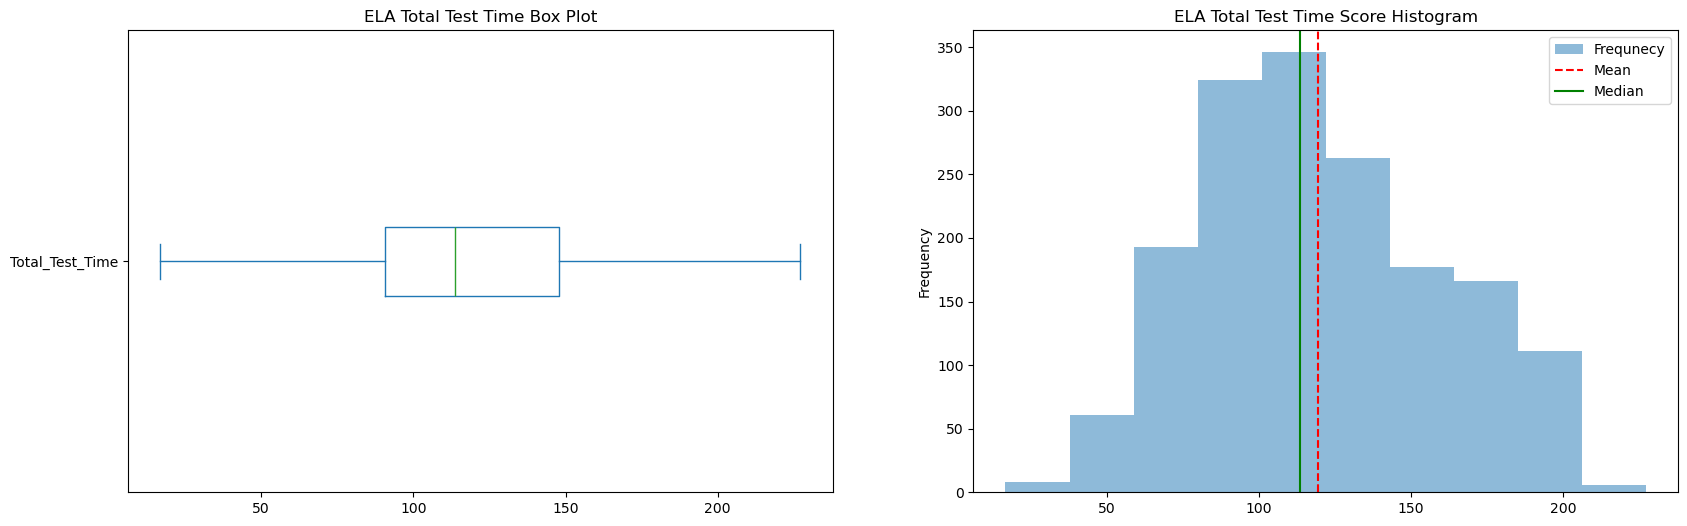

In [11]:
# statistical metrics
mean = round(df_ela_6_9['Total_Test_Time'].mean(),2)
median = round(df_ela_6_9['Total_Test_Time'].median(),2)

# plotting Test Scale Score Distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

df_ela_6_9['Total_Test_Time'].plot(kind = 'box', vert = False, title = f'{subject} Total Test Time Box Plot', ax = ax[0])
df_ela_6_9['Total_Test_Time'].plot(kind = 'hist', title = f'{subject} Total Test Time Score Histogram', ax = ax[1], alpha = .5)

ax[1].axvline(x = mean, linestyle = '--', color = 'red')
ax[1].axvline(x = median, linestyle= '-', color = 'green')

plt.legend(['Frequnecy','Mean','Median'])

plt.show()

In [12]:
print(f"The typical test time for the NJSLA {subject} is {round(median,2)} minutes",
     f"\nThe typical testing time for students who were proficient in {subject} on the NJSLA is {round(df_ela_6_9[df_ela_6_9['proficient']==1]['Total_Test_Time'].median(),2)} minutes.",
     f"\nThe typical testing_time_for students who were not proficient in {subject} on the NJSLA is {round(df_ela_6_9[df_ela_6_9['proficient']==0]['Total_Test_Time'].median(),2)} minutes.",
     f"\nThat is a difference of {round(df_ela_6_9[df_ela_6_9['proficient']==1]['Total_Test_Time'].median()-df_ela_6_9[df_ela_6_9['proficient']==0]['Total_Test_Time'].median(),2)} additional minutes spent testing for students who were proficient in {subject} on the NJSLA ")

The typical test time for the NJSLA ELA is 113.53 minutes 
The typical testing time for students who were proficient in ELA on the NJSLA is 121.73 minutes. 
The typical testing_time_for students who were not proficient in ELA on the NJSLA is 79.36 minutes. 
That is a difference of 42.38 additional minutes spent testing for students who were proficient in ELA on the NJSLA 


In [13]:
# creating ols formula
ols_formula = "TestScaleScore ~ Total_Test_Time"

# creating ols object
OLS = ols(formula = ols_formula, data = df_ela_6_9)

# fitting model
model = OLS.fit()

# model summary
model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TestScaleScore   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     675.3
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          4.30e-125
Time:                        15:06:56   Log-Likelihood:                -7968.6
No. Observations:                1653   AIC:                         1.594e+04
Df Residuals:                    1651   BIC:                         1.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         718.8922      2.371    303.225      0.000     714.242     723.542
Total_Test_Time     0.4894      0.019     25.986      0.000       0.452       0.526
==============================================================================
Omnibus:                      124.663   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.469
Skew:                          -0.618   Prob(JB):                     7.89e-39
Kurtosis:                       4.011   Cond. No.                         404.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(f"The correlation coefficient between testing time and scale score is {df_ela_6_9['Total_Test_Time'].corr(df_ela_6_9['TestScaleScore']):.2}, indicative of a moderate positive correlation",
     f"\n\nThe p-value is less than 0.05 refuting the null hypothesis and confirming that there is a statistical significance in the relationship between the independent and dependent variables.",
     f"\n\nThe r-squared value is {model.rsquared:.3} is relatively high, and means that the independent variable accounts for {model.rsquared:.1%} of the variable in the dependent variable.",
     f"\n\nLastly based on the model for every additional minute spent testing there is approximate score increase of 0.49 in the Test Scale Score ")

The correlation coefficient between testing time and scale score is 0.54, indicative of a moderate positive correlation 

The p-value is less than 0.05 refuting the null hypothesis and confirming that there is a statistical significance in the relationship between the independent and dependent variables. 

The r-squared value is 0.29 is relatively high, and means that the independent variable accounts for 29.0% of the variable in the dependent variable. 

Lastly based on the model for every additional minute spent testing there is approximate score increase of 0.49 in the Test Scale Score 


### Linear Assumptions:
1. **Linearity** - Each predictor value is linearly related to the outcome variable
2. **Normality** - The errors are normally distributed.
3. **Independent** Observations - Each observation in the dataset is independent.
4. **Homoscedasticity** - The variance of the errors is constant or similar across the model

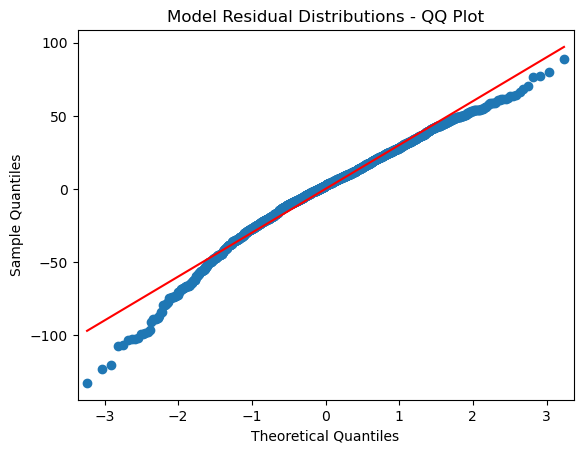

In [15]:
# testing normality
residuals = model.resid
fig = sm.qqplot(residuals, line = 's')
plt.title('Model Residual Distributions - QQ Plot')
plt.show()

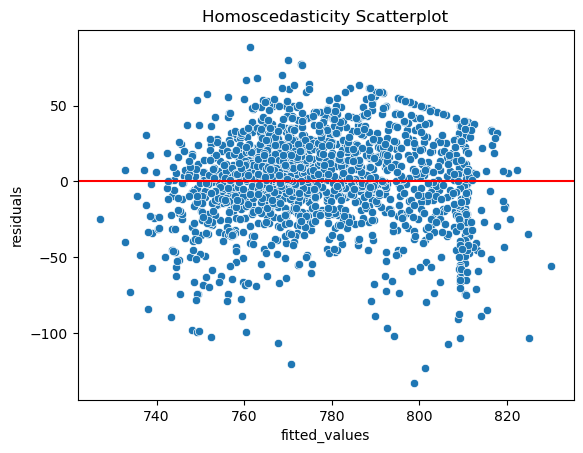

In [16]:
# Homoscedasticity
fitted_values = model.predict(df_ela_6_9['Total_Test_Time'])
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0, color = 'red')
fig.set_xlabel('fitted_values')
fig.set_ylabel('residuals')
fig.set_title('Homoscedasticity Scatterplot')
plt.show()

In [17]:
# creating predictions based on the model

# creating the dataframe for predictions
df_ela_pred = pd.DataFrame({
    'Total_Test_Time':df_ela_6_9['Total_Test_Time']})
# sorting
df_ela_pred = df_ela_pred.sort_values(by = 'Total_Test_Time')

# #adding p redictions
df_ela_pred['Predicted Scale Score'] = model.predict(df_ela_pred['Total_Test_Time'])

# adding residuals to the dataframe
df_ela_pred['Residuals'] = model.resid

#residual statistics
df_ela_pred['Residuals'].describe()

count    1.653000e+03
mean     6.910619e-13
std      3.002545e+01
min     -1.328095e+02
25%     -1.716605e+01
50%      2.316546e+00
75%      1.995937e+01
max      8.874685e+01
Name: Residuals, dtype: float64

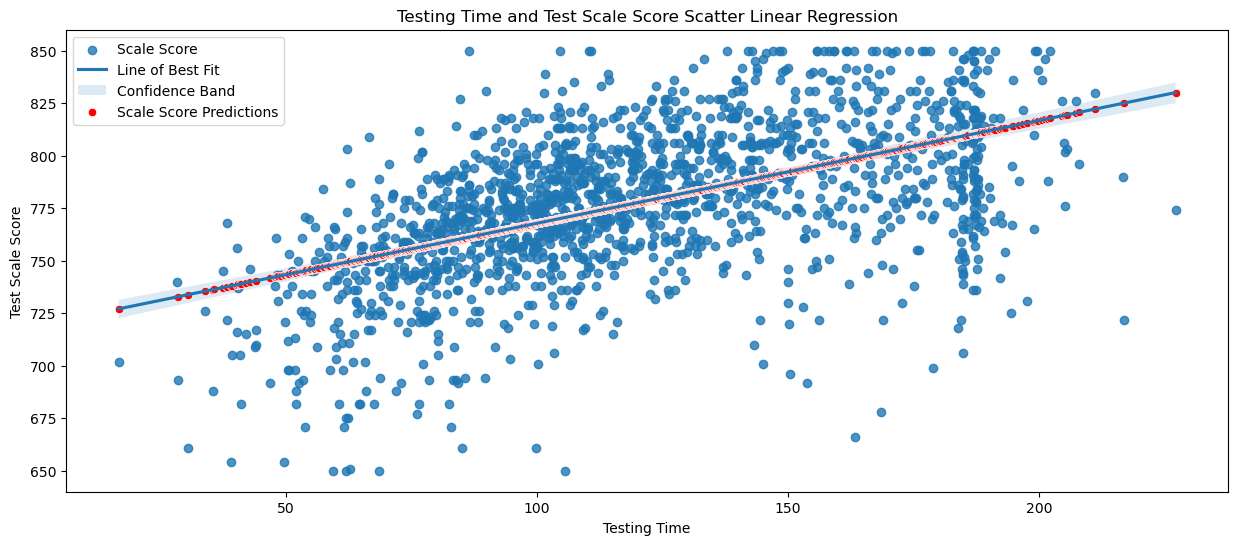

In [18]:
fig = plt.figure(figsize = (15,6))

sns.regplot(x = 'Total_Test_Time', y = 'TestScaleScore', data = df_ela_6_9)
plt.title('Testing Time and Test Scale Score Scatter Linear Regression')
plt.xlabel('Testing Time')
plt.ylabel('Test Scale Score')

sns.scatterplot(data = df_ela_pred, x = 'Total_Test_Time', y = 'Predicted Scale Score', color = 'red')
plt.legend(['Scale Score','Line of Best Fit','Confidence Band','Scale Score Predictions'])
plt.show()

plt.show()